# numba acceleration

timing the Numba compiler's acceleration effect on NumPy trigonometry and array broadcasting functions

both Numba functions are called once for just-in-time compilation<br>
they are compiled in nophython mode witch generates code that does not access the Python C API<br>
(this compilation mode produces the highest performance code)


In [1]:
from numba import jit
import numpy as np
import timeit
import matplotlib.pyplot as plt

In [2]:
def default_trig(a):
    trace = 0.0
    for i in range(a.shape[0]):
        trace += np.tanh(a[i, i])
    return a + trace

@jit(nopython=True)
def numba_trig(a):
    trace = 0.0
    for i in range(a.shape[0]):
        trace += np.tanh(a[i, i])
    return a + trace

In [3]:
x = np.arange(100).reshape(10, 10)
numba_trig(x)

array([[  9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.],
       [ 19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.],
       [ 29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.],
       [ 39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.],
       [ 49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.],
       [ 59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.],
       [ 69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.],
       [ 79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.],
       [ 89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.],
       [ 99., 100., 101., 102., 103., 104., 105., 106., 107., 108.]])

---

In [4]:
def default_convolution(kernel, image):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    output = np.zeros((output_height, output_width))
    
    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.sum(kernel * image[i:i+kernel_height, j:j+kernel_width])
    
    return output

@jit(nopython=True)
def numba_convolution(kernel, image):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    output = np.zeros((output_height, output_width))
    
    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.sum(kernel * image[i:i+kernel_height, j:j+kernel_width])
    
    return output

In [5]:
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])
image = np.random.randint(0, 255, size=(100, 100))
numba_convolution(kernel, image)

array([[ 123., -125.,   46., ...,   32.,  188.,  247.],
       [ 225., -178., -216., ...,  238.,  136.,  -36.],
       [ 370.,  248., -425., ...,  -57.,  240.,  -58.],
       ...,
       [  20.,   16.,  -65., ..., -102.,  168.,   57.],
       [ -56.,   -2.,   96., ..., -126.,    3.,  238.],
       [-327., -124.,  363., ..., -207.,  167.,  158.]])

# Benchmarks

In [6]:
def time(default_func, numba_func, repeat=1000, number=1000):
    def_timer = timeit.Timer(default_func, globals=globals())
    numba_timer = timeit.Timer(numba_func, globals=globals())
    
    def_times= def_timer.repeat(repeat=repeat, number=number)
    numba_times = numba_timer.repeat(repeat=repeat, number=number)
    
    speedups = [d / n if n > 0 else float('inf') for d, n in zip(def_times, numba_times)]
    avg_speedup = np.mean(speedups)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, repeat+1), speedups, color='b', label="speedup (default / Numba)")
    plt.axhline(y=avg_speedup, color='red', linestyle='--', label=f"average speedup ({avg_speedup:.2f}x)")
    plt.ylim(0, max(speedups) * 1.1)
    plt.xlabel("trial")
    plt.ylabel("speedup")
    plt.title("speed increase of Numba-optimized function")
    plt.legend()
    plt.grid(True)
    plt.show()

#### 1 - trig function:

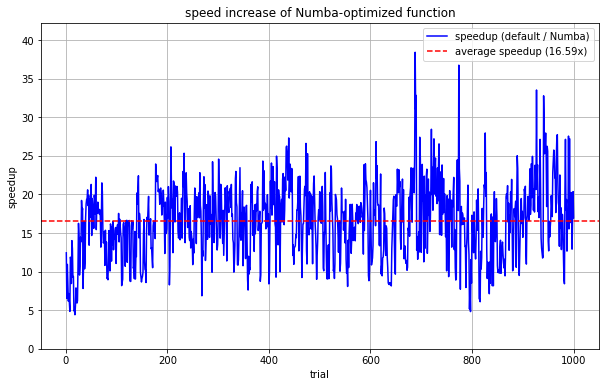

In [7]:
time('default_trig(x)', 'numba_trig(x)')

#### 2 - convolution function:

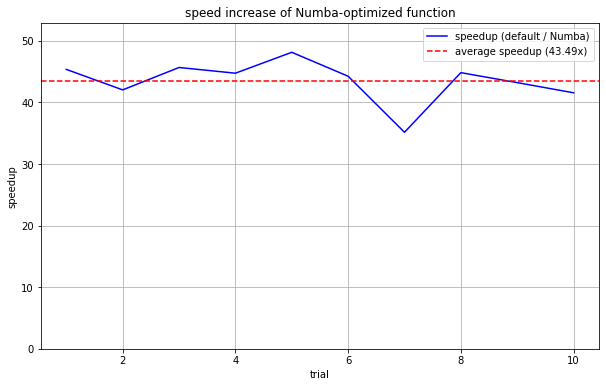

In [8]:
time('default_convolution(kernel, image)', 'numba_convolution(kernel, image)', repeat=10, number=100)